In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import warnings


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантажуємо дані з файлів
generation_data = pd.read_csv('data_october/Plant1_Generation_Data.csv')
weather_data = pd.read_csv('data_october/Plant1_Weather_Sensor_Data.csv')

# Конвертуємо колонку з датою в datetime формат
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M')

# Об'єднуємо дані за датою і часом
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Видаляємо непотрібні колонки
df = df.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

# Заповнення або обробка відсутніх значень
df.fillna(0, inplace=True)

# Нормалізуємо дані для побудови моделі
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Колонки для моделювання
df_scaled = pd.DataFrame(scaler.fit_transform(df[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]), columns=['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'])

# Готові дані для побудови графіків або подальшого аналізу
df_scaled.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data_october/Plant1_Generation_Data.csv'

## Завантаження даних

In [ ]:
path_mnist = 'data_october/metingen_27feb2022.csv'  
path_data_2d = 'data_october/PV_Elec_Gas3.csv'  

mnist_data = pd.read_csv(path_mnist)
data_2d = pd.read_csv(path_data_2d)

FileNotFoundError: [Errno 2] No such file or directory: 'data_october/metingen_27feb2022.csv'

In [ ]:
mnist_data.head()

,data,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3


In [ ]:
data_2d.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Шляхи до файлів
path_mnist = 'data/metingen_27feb2022.csv'
path_data_2d = 'data/PV_Elec_Gas3.csv'

# Завантаження даних
mnist_data = pd.read_csv(path_mnist)
data_2d = pd.read_csv(path_data_2d)

# Перегляд перших кількох рядків кожного датасету
print(mnist_data.head())
print(data_2d.head())


         data  Cumulative_solar_power  kWh electricity/day  Gas/day
0  26/10/2011                     0.1                 15.1      9.0
1  27/10/2011                    10.2                  7.4      9.2
2  28/10/2011                    20.2                  5.8      8.0
3  29/10/2011                    29.6                  4.9      6.6
4  30/10/2011                    34.2                 11.7      5.3
         date  Cumulative_solar_power  kWh electricity/day  Gas/day
0  26/10/2011                     0.1                 15.1      9.0
1  27/10/2011                    10.2                  7.4      9.2
2  28/10/2011                    20.2                  5.8      8.0
3  29/10/2011                    29.6                  4.9      6.6
4  30/10/2011                    34.2                 11.7      5.3


In [ ]:
# Виведення назв стовпців датасету
print(data_2d.columns)

Index(['date', 'Cumulative_solar_power', 'kWh electricity/day', 'Gas/day'], dtype='object')


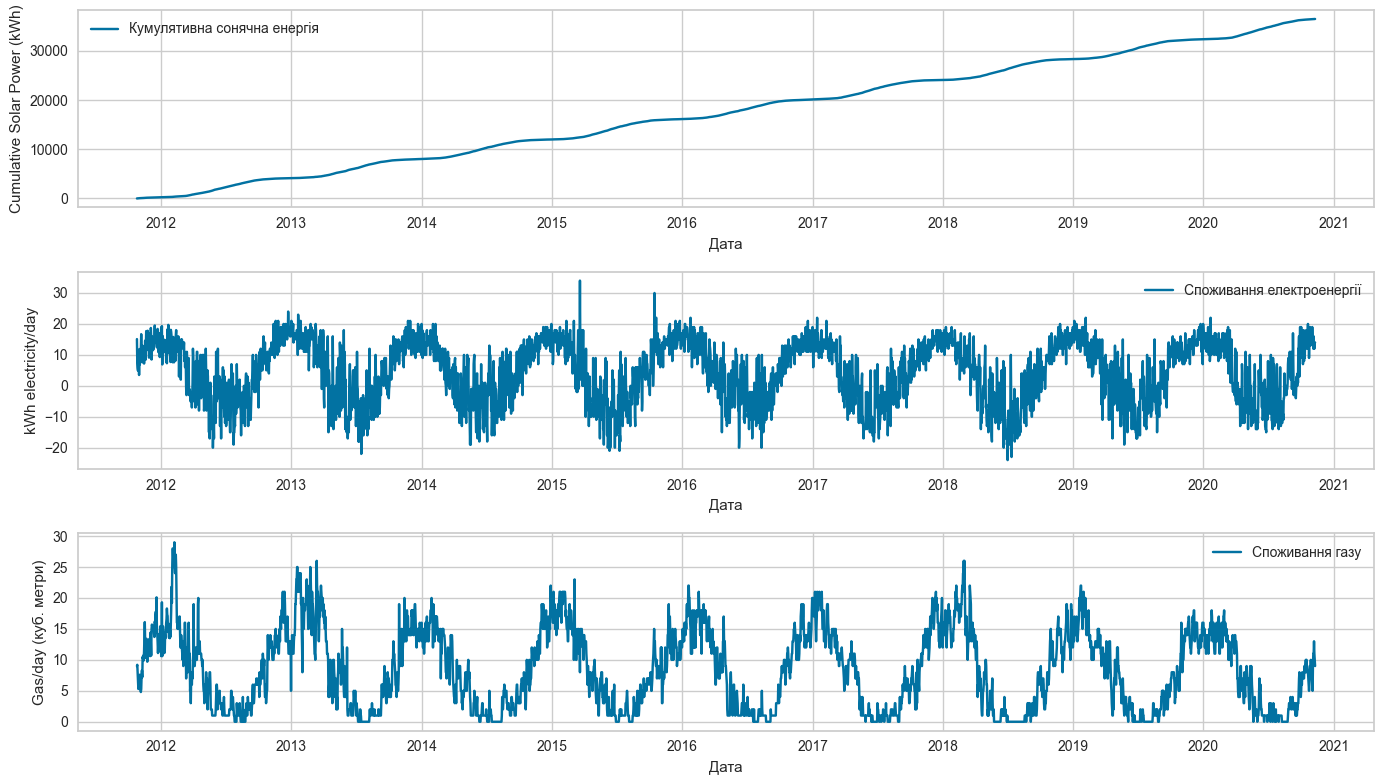

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Шляхи до файлів
path_mnist = 'data/metingen_27feb2022.csv'
path_data_2d = 'data/PV_Elec_Gas3.csv'

# Завантаження даних
mnist_data = pd.read_csv(path_mnist)
data_2d = pd.read_csv(path_data_2d)

# Конвертація стовпця з датами в datetime формат
data_2d['date'] = pd.to_datetime(data_2d['date'], format='%d/%m/%Y')

# Побудова графіків
plt.figure(figsize=(14, 8))

# Кумулятивна сонячна енергія
plt.subplot(3, 1, 1)
plt.plot(data_2d['date'], data_2d['Cumulative_solar_power'], label='Кумулятивна сонячна енергія')
plt.xlabel('Дата')
plt.ylabel('Cumulative Solar Power (kWh)')
plt.legend()

# Споживання електроенергії
plt.subplot(3, 1, 2)
plt.plot(data_2d['date'], data_2d['kWh electricity/day'], label='Споживання електроенергії')
plt.xlabel('Дата')
plt.ylabel('kWh electricity/day')
plt.legend()

# Споживання газу
plt.subplot(3, 1, 3)
plt.plot(data_2d['date'], data_2d['Gas/day'], label='Споживання газу')
plt.xlabel('Дата')
plt.ylabel('Gas/day (куб. метри)')
plt.legend()

plt.tight_layout()
plt.show()


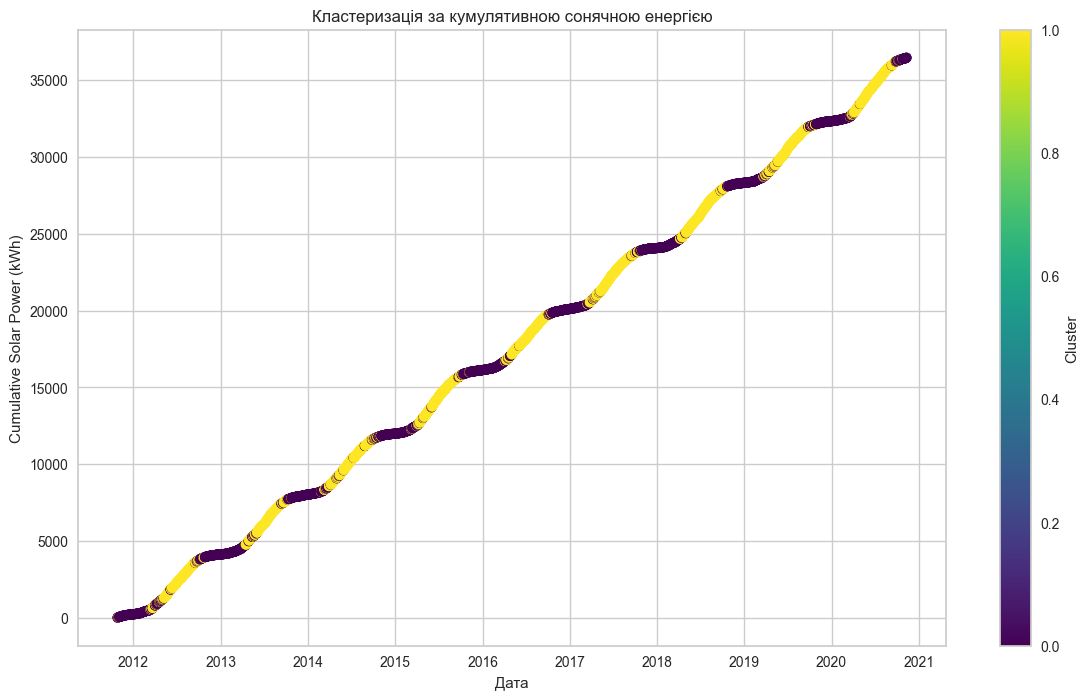

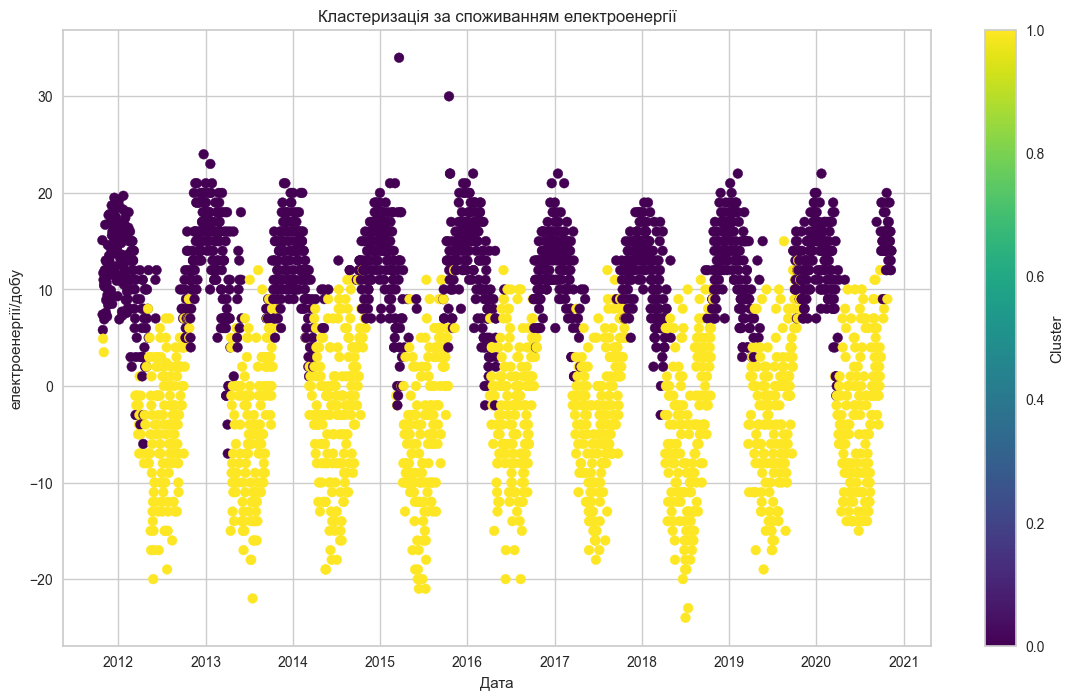

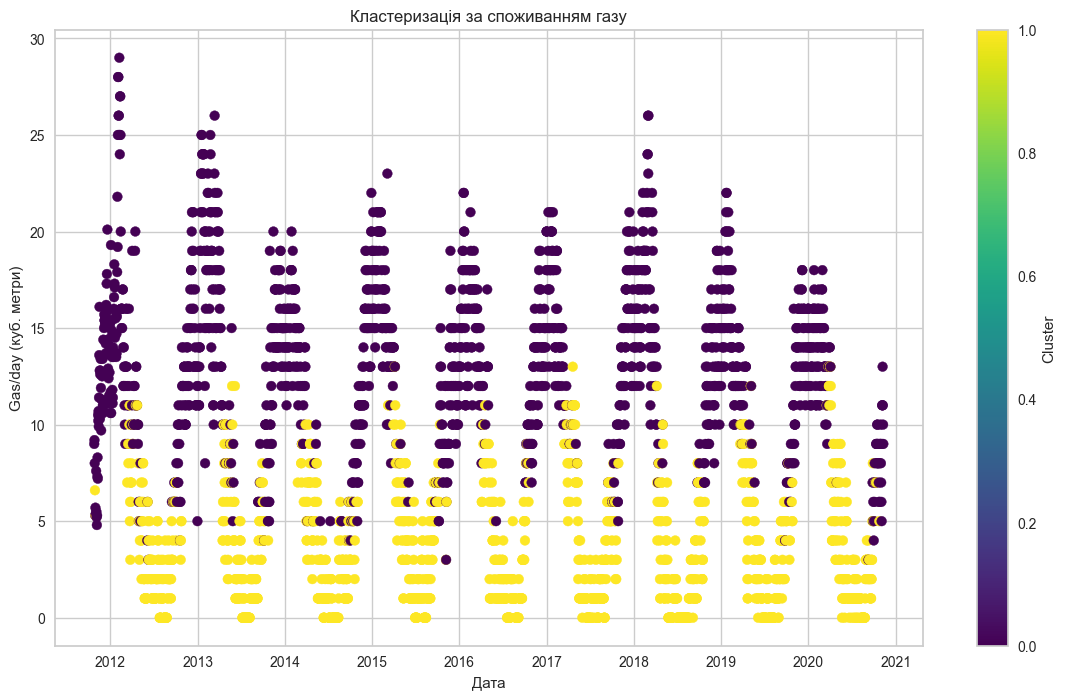

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Шляхи до файлів
path_data_2d = 'data/PV_Elec_Gas3.csv'

# Завантаження даних
data_2d = pd.read_csv(path_data_2d)

# Конвертація стовпця з датами в datetime формат
data_2d['date'] = pd.to_datetime(data_2d['date'], format='%d/%m/%Y')

# Підготовка даних для кластеризації
features = data_2d[['Cumulative_solar_power', 'kWh electricity/day', 'Gas/day']]

# Стандартизація даних
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Кластеризація за допомогою K-середніх
kmeans = KMeans(n_clusters=2, random_state=42)
data_2d['cluster'] = kmeans.fit_predict(scaled_features)

# Візуалізація кластерів
plt.figure(figsize=(14, 8))
plt.scatter(data_2d['date'], data_2d['Cumulative_solar_power'], c=data_2d['cluster'], cmap='viridis', label='Cumulative_solar_power')
plt.xlabel('Дата')
plt.ylabel('Cumulative Solar Power (kWh)')
plt.title('Кластеризація за кумулятивною сонячною енергією')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(14, 8))
plt.scatter(data_2d['date'], data_2d['kWh electricity/day'], c=data_2d['cluster'], cmap='viridis', label='kWh electricity/day')
plt.xlabel('Дата')
plt.ylabel('електроенергії/добу')
plt.title('Кластеризація за споживанням електроенергії')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(14, 8))
plt.scatter(data_2d['date'], data_2d['Gas/day'], c=data_2d['cluster'], cmap='viridis', label='Gas/day')
plt.xlabel('Дата')
plt.ylabel('Gas/day (куб. метри)')
plt.title('Кластеризація за споживанням газу')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Каталог з даними
data_dir = 'data_october/Faulty_solar_panel'

# Використаємо ImageDataGenerator для попередньої обробки зображень
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,  # Відокремлюємо 20% для валідації
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(150, 150),  # Розмір зображення
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         subset='validation')

# Отримуємо кількість класів
classes = train_generator.class_indices
print("Класи: ", classes)


ModuleNotFoundError: No module named 'tensorflow.python'

## підготовка даних для k-means

In [ ]:
X_mnist = mnist_data.iloc[:, 1:].values  
X_2d = data_2d.values


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Шляхи до файлів
path_plant_1_gen = 'data_october/Plant_1_Generation_Data.csv'
path_plant_1_weather = 'data_october/Plant_1_Weather_Sensor_Data.csv'
path_plant_2_gen = 'data_october/Plant_2_Generation_Data.csv'
path_plant_2_weather = 'data_october/Plant_2_Weather_Sensor_Data.csv'

# Завантаження даних
plant_1_gen = pd.read_csv(path_plant_1_gen)
plant_1_weather = pd.read_csv(path_plant_1_weather)
plant_2_gen = pd.read_csv(path_plant_2_gen)
plant_2_weather = pd.read_csv(path_plant_2_weather)

# Перегляд перших кількох рядків кожного датасету
plant_1_gen.head()
plant_1_weather.head()
plant_2_gen.head()
plant_2_weather.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантажуємо дані з файлів
generation_data = pd.read_csv('data_october/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('data_october/Plant_1_Weather_Sensor_Data.csv')

# Конвертуємо колонку з датою в datetime формат
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M')

# Об'єднуємо дані за датою і часом
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Видаляємо непотрібні колонки
df = df.drop(columns=['PLANT_ID', 'SOURCE_KEY'])

# Заповнення або обробка відсутніх значень
df.fillna(0, inplace=True)

# Нормалізуємо дані для побудови моделі
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Колонки для моделювання
df_scaled = pd.DataFrame(scaler.fit_transform(df[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]), columns=['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'])

# Готові дані для побудови графіків або подальшого аналізу
df_scaled.head()

ValueError: time data "15-05-2020 00:00" doesn't match format "%Y-%m-%d %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Перетворення стовпця з датами у формат datetime
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'])

# Об'єднання даних для кожного парку
plant_1 = pd.merge(plant_1_gen, plant_1_weather, on='DATE_TIME')
plant_2 = pd.merge(plant_2_gen, plant_2_weather, on='DATE_TIME')

# Перегляд перших кількох рядків об'єднаних датасетів
print(plant_1.head())
print(plant_2.head())


   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
1    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
2    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
3    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
4    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.857507          0.0  
2          

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_27628\1105258092.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])


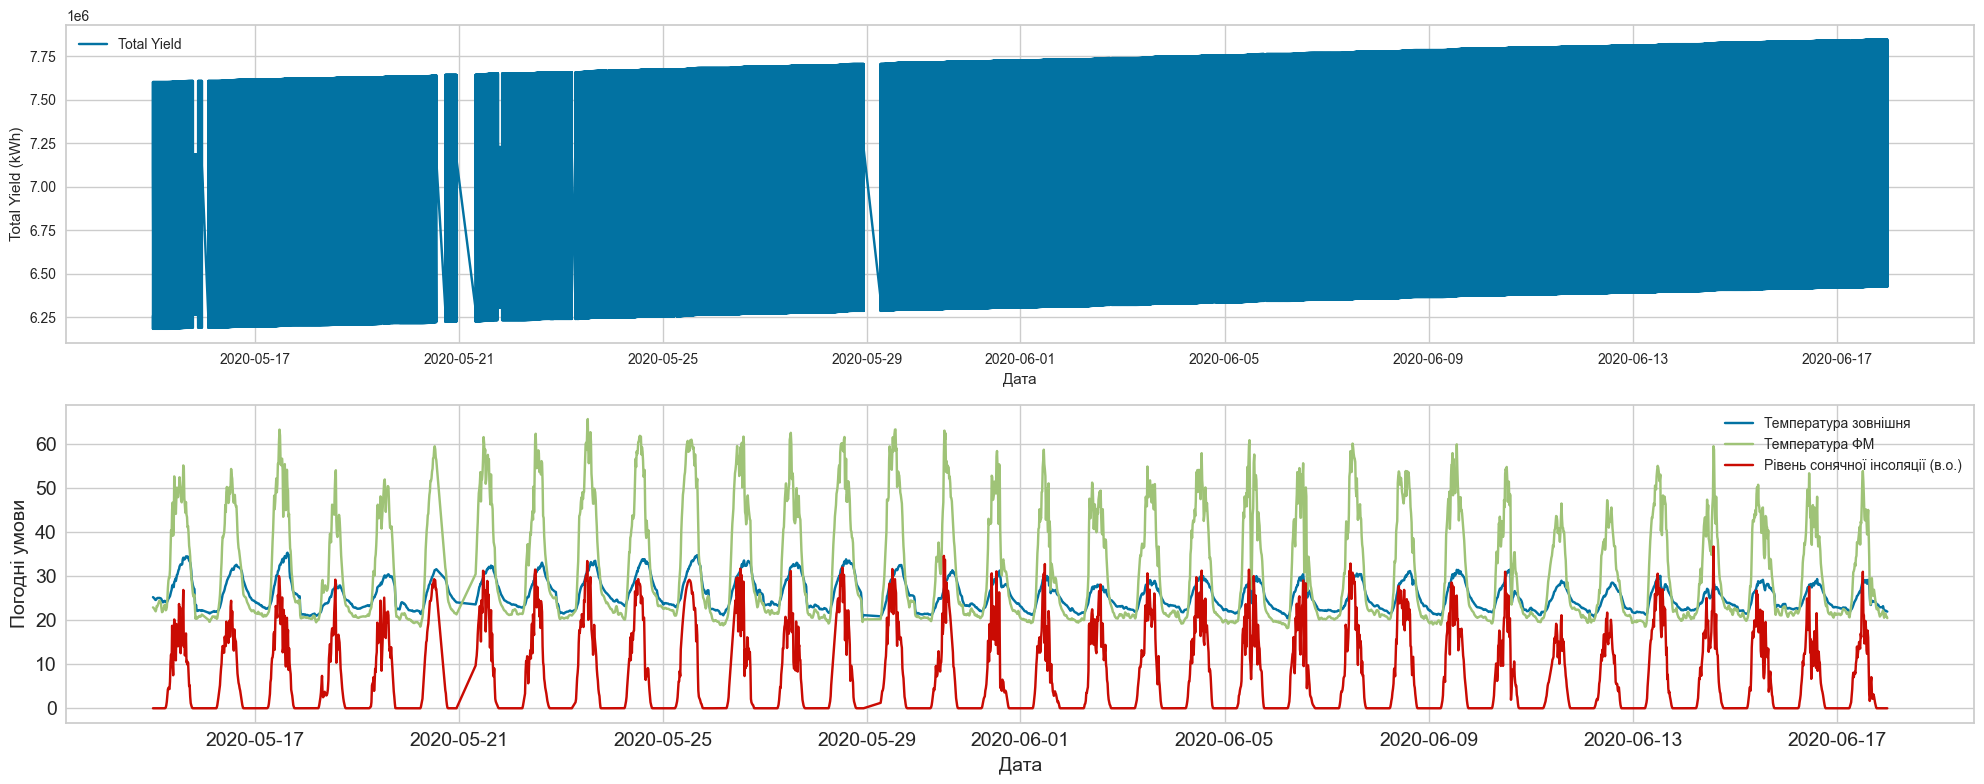

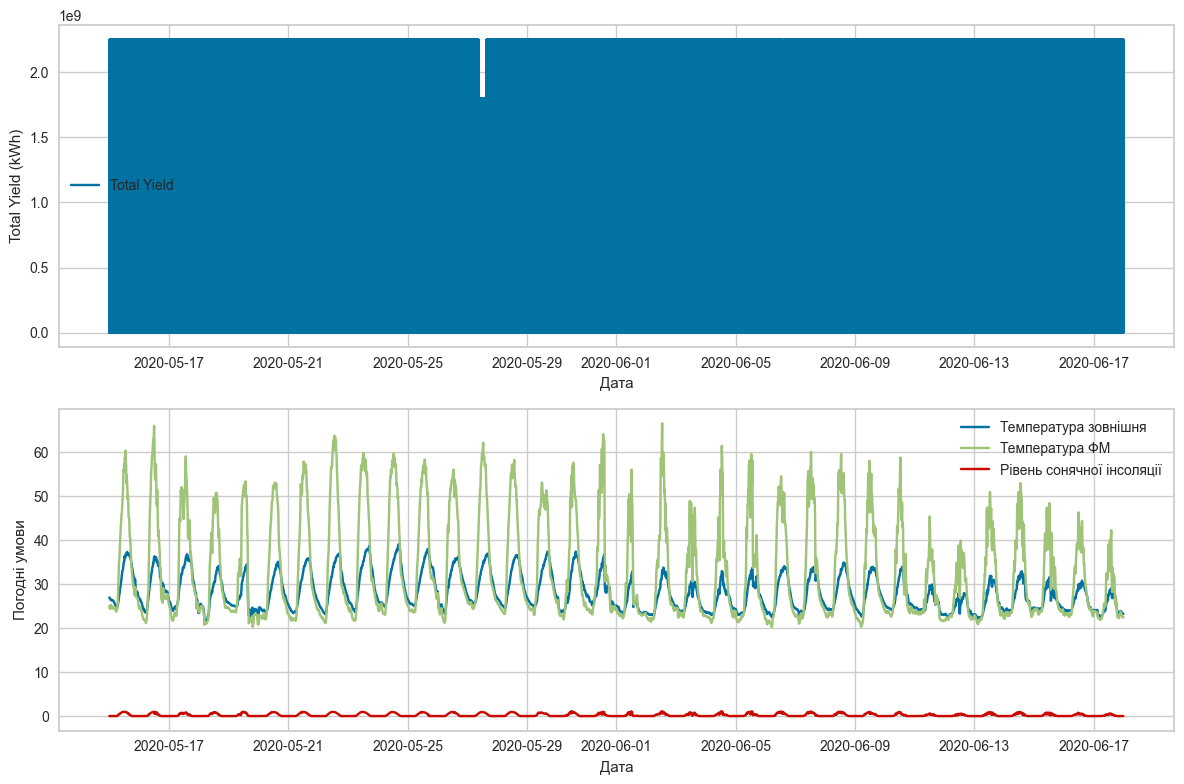

In [ ]:

# Візуалізація вироблення електроенергії та погодних даних для Plant 1
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot(plant_1['DATE_TIME'], plant_1['TOTAL_YIELD'], label='Total Yield')
plt.xlabel('Дата')
plt.ylabel('Total Yield (kWh)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(plant_1['DATE_TIME'], plant_1['AMBIENT_TEMPERATURE'], label='Температура зовнішня')
plt.plot(plant_1['DATE_TIME'], plant_1['MODULE_TEMPERATURE'], label='Температура ФМ')
plt.plot(plant_1['DATE_TIME'], plant_1['IRRADIATION']*30, label='Рівень сонячної інсоляції (в.о.)')
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Погодні умови', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

# Те ж саме для Plant 2
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(plant_2['DATE_TIME'], plant_2['TOTAL_YIELD'], label='Total Yield')
plt.xlabel('Дата')
plt.ylabel('Total Yield (kWh)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(plant_2['DATE_TIME'], plant_2['AMBIENT_TEMPERATURE'], label='Температура зовнішня')
plt.plot(plant_2['DATE_TIME'], plant_2['MODULE_TEMPERATURE'], label='Температура ФМ')
plt.plot(plant_2['DATE_TIME'], plant_2['IRRADIATION'], label='Рівень сонячної інсоляції')
plt.xlabel('Дата')
plt.ylabel('Погодні умови')
plt.legend()

plt.tight_layout()
plt.show()



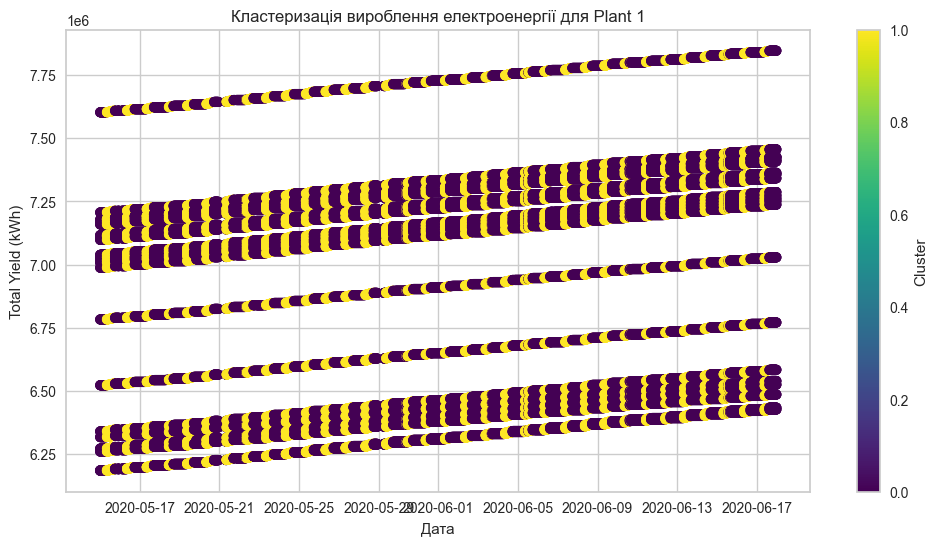

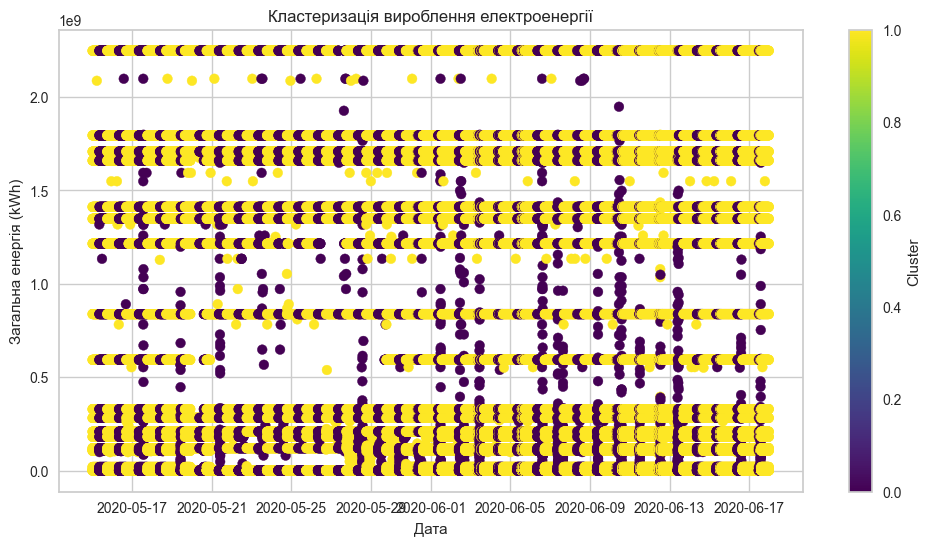

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Вибір характеристик для кластеризації
features_plant_1 = plant_1[['TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
features_plant_2 = plant_2[['TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

# Стандартизація даних
scaler = StandardScaler()
scaled_features_plant_1 = scaler.fit_transform(features_plant_1)
scaled_features_plant_2 = scaler.fit_transform(features_plant_2)

# Кластеризація K-середніх
kmeans_plant_1 = KMeans(n_clusters=2, random_state=0)
plant_1['cluster'] = kmeans_plant_1.fit_predict(scaled_features_plant_1)

kmeans_plant_2 = KMeans(n_clusters=2, random_state=42)
plant_2['cluster'] = kmeans_plant_2.fit_predict(scaled_features_plant_2)

# Візуалізація кластерів
plt.figure(figsize=(12, 6))
plt.scatter(plant_1['DATE_TIME'], plant_1['TOTAL_YIELD'], c=plant_1['cluster'], cmap='viridis', label='Total Yield')
plt.xlabel('Дата')
plt.ylabel('Total Yield (kWh)')
plt.title('Кластеризація вироблення електроенергії для Plant 1')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(plant_2['DATE_TIME'], plant_2['TOTAL_YIELD'], c=plant_2['cluster'], cmap='viridis', label='Total Yield')
plt.xlabel('Дата')
plt.ylabel('Загальна енергія (kWh)')
plt.title('Кластеризація вироблення електроенергії')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Шляхи до файлів
path_plant_1_gen = 'data2/Plant_1_Generation_Data.csv'
path_plant_1_weather = 'data2/Plant_1_Weather_Sensor_Data.csv'
path_plant_2_gen = 'data2/Plant_2_Generation_Data.csv'
path_plant_2_weather = 'data2/Plant_2_Weather_Sensor_Data.csv'

# Завантаження даних
plant_1_gen = pd.read_csv(path_plant_1_gen)
plant_1_weather = pd.read_csv(path_plant_1_weather)
plant_2_gen = pd.read_csv(path_plant_2_gen)
plant_2_weather = pd.read_csv(path_plant_2_weather)

# Конвертація стовпця з датами у формат datetime
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'])

# Об'єднання даних для кожного парку
plant_1 = pd.merge(plant_1_gen, plant_1_weather, on='DATE_TIME')
plant_2 = pd.merge(plant_2_gen, plant_2_weather, on='DATE_TIME')

# Вибір характеристик для розрахунку часових характеристик
features = ['TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']



C:\Users\Dmitry\AppData\Local\Temp\ipykernel_27628\1581873328.py:17: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])


In [ ]:
import numpy as np
import pandas as pd
# Завантаження даних
generation_data = pd.read_csv('data2/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('data2/Plant_1_Weather_Sensor_Data.csv')
# Перетворення стовпця DATE_TIME на тип datetime з правильним форматом
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
# Об'єднання датасетів
data = pd.merge(generation_data, weather_data, on='DATE_TIME', how='inner')
# Перевірка, чи датасет не порожній
if data.empty:
    raise ValueError("The merged dataset is empty. Please check the input data files.")
# Вибір ознак
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = (data['DC_POWER'] > data['DC_POWER'].median()).astype(int)  
# Класифікація на високий та низький рівні потужності
# Перевірка, чи мітки не порожні
if len(y) == 0:
    raise ValueError("The target variable 'y' is empty. Please check the input data.")
# Нормалізація ознак
X = (X - X.mean()) / X.std()
# Додавання стовпця з одиницями для вільного члена
X = np.c_[np.ones(X.shape[0]), X]
# Ініціалізація ваг
w = np.zeros(X.shape[1])
# Сигмоїдна функція
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Функція втрат
def loss(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    return -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
# Градієнтний спуск
def gradient_descent(X, y, w, alpha, iterations):
    m = len(y)
    if m == 0:
        raise ValueError("The number of samples 'm' is zero. Gradient descent cannot proceed.")
    for i in range(iterations):
        h = sigmoid(np.dot(X, w))
        w -= alpha/m * np.dot(X.T, (h - y))
    return w
# Навчання моделі
alpha = 0.01
iterations = 1000
w = gradient_descent(X, y, w, alpha, iterations)
# Прогнозування
predictions = sigmoid(np.dot(X, w)) >= 0.5
# Оцінка точності
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 90.01%


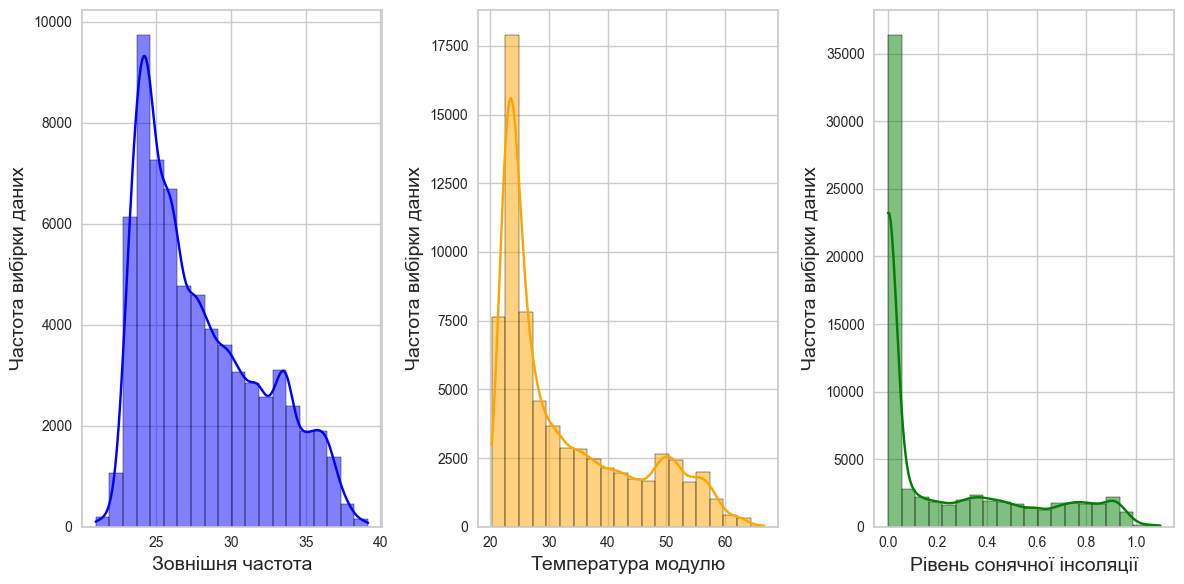

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_27628\3106823730.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


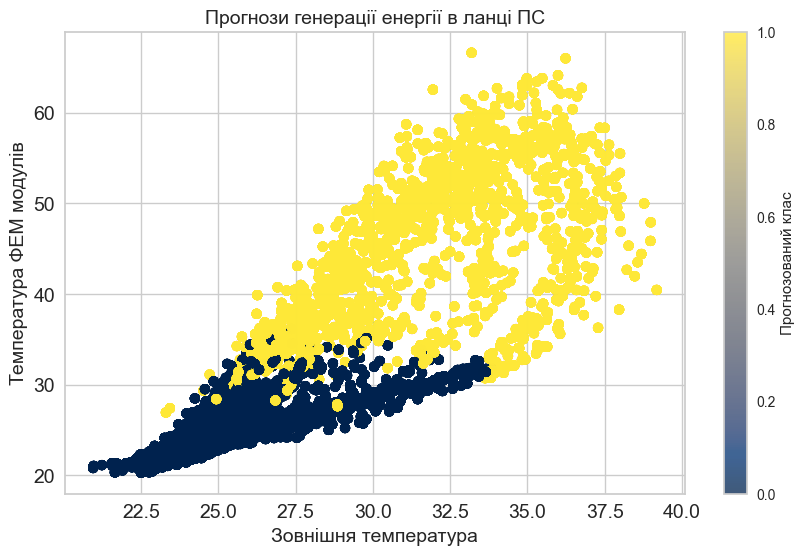

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_27628\3106823730.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


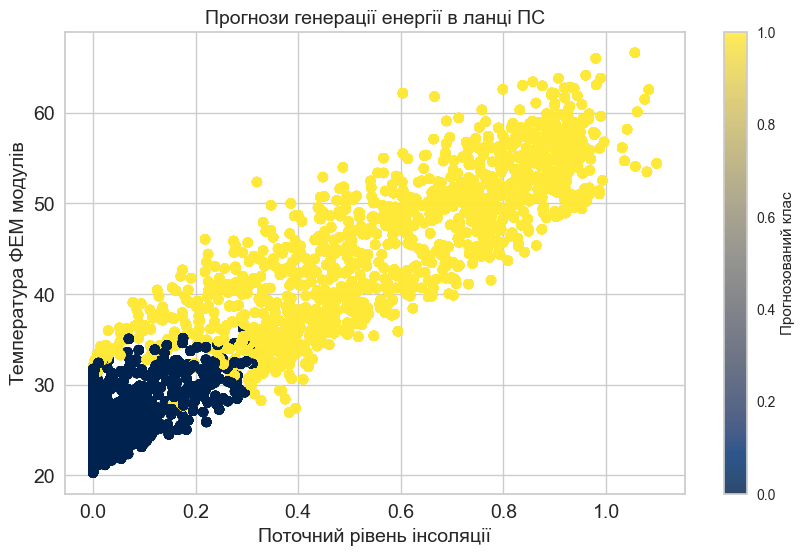

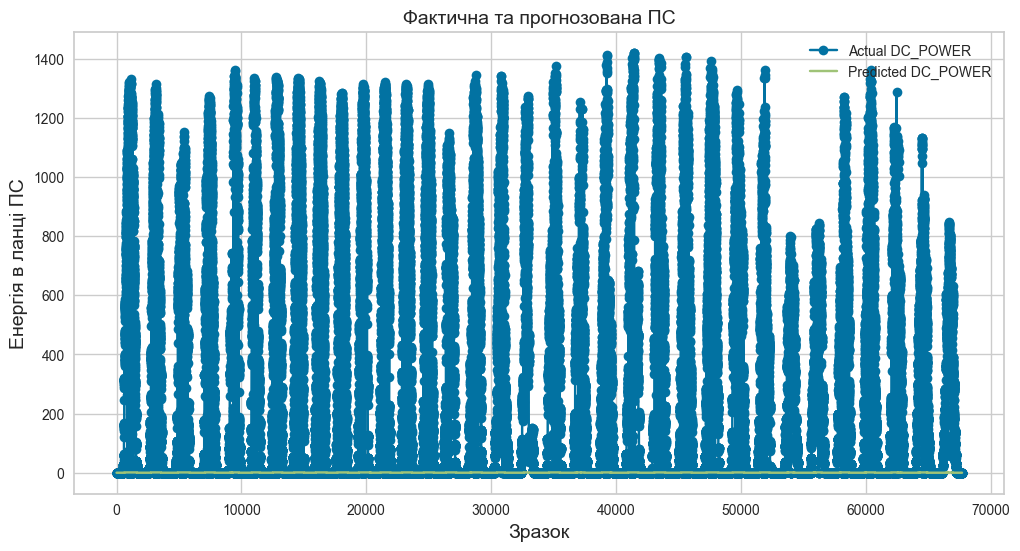

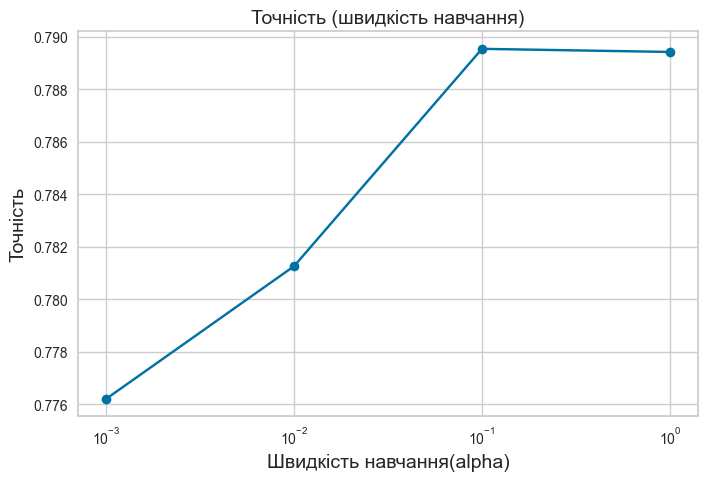

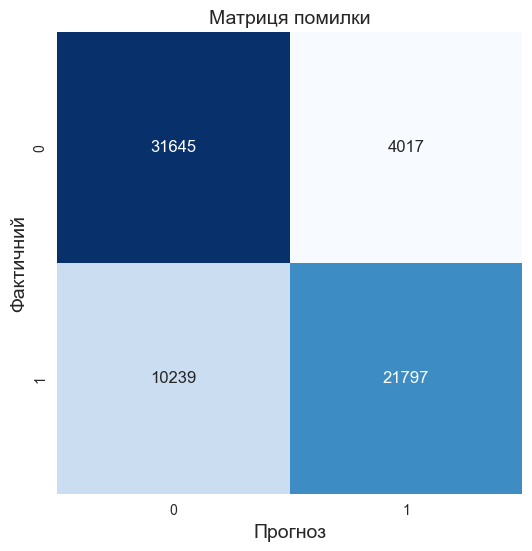

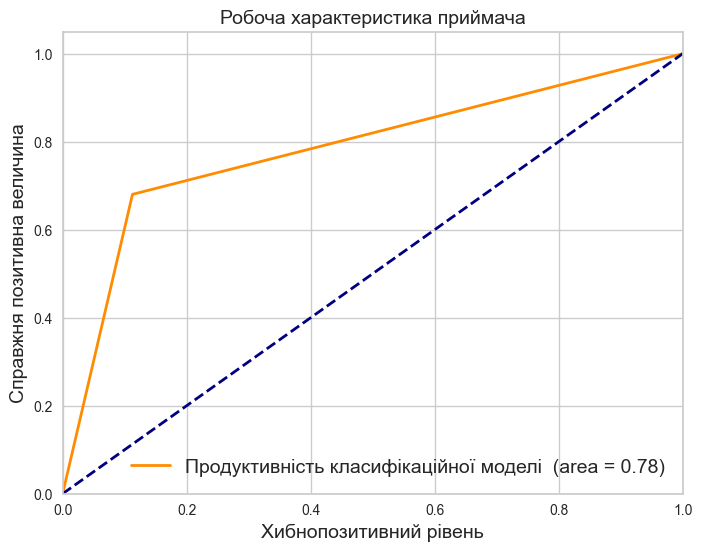

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Розподіл даних
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['AMBIENT_TEMPERATURE'], bins=20, kde=True, color='blue')
plt.xlabel('Зовнішня частота', fontsize=14)
plt.ylabel('Частота вибірки даних', fontsize=14)

plt.subplot(1, 3, 2)
sns.histplot(data['MODULE_TEMPERATURE'], bins=20, kde=True, color='orange')
plt.xlabel('Температура модулю', fontsize=14)
plt.ylabel('Частота вибірки даних', fontsize=14)

plt.subplot(1, 3, 3)
sns.histplot(data['IRRADIATION'], bins=20, kde=True, color='green')
plt.xlabel('Рівень сонячної інсоляції', fontsize=14)
plt.ylabel('Частота вибірки даних', fontsize=14)

plt.tight_layout()
plt.show()


# Scatter plot з прогнозами
plt.figure(figsize=(10, 6))
plt.scatter(data['AMBIENT_TEMPERATURE'], data['MODULE_TEMPERATURE'], c=predictions, cmap='cividis', alpha=0.75)
plt.xlabel('Зовнішня температура', fontsize=14)
plt.ylabel('Температура ФЕМ модулів', fontsize=14)
plt.title('Прогнози генерації енергії в ланці ПС', fontsize=14)
plt.colorbar(label='Прогнозований клас')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Scatter plot з прогнозами
plt.figure(figsize=(10, 6))
plt.scatter(data['IRRADIATION'], data['MODULE_TEMPERATURE'], c=predictions, cmap='cividis', alpha=0.82)
plt.xlabel('Поточний рівень інсоляції', fontsize=14)
plt.ylabel('Температура ФЕМ модулів', fontsize=14)
plt.title('Прогнози генерації енергії в ланці ПС', fontsize=14)
plt.colorbar(label='Прогнозований клас')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Графік реальних і прогнозованих значень DC_POWER
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DC_POWER'], label='Actual DC_POWER', marker='o')
plt.plot(data.index, predictions.astype(int), label='Predicted DC_POWER', marker='x')
plt.xlabel('Зразок', fontsize=14)
plt.ylabel('Енергія в ланці ПС', fontsize=14)
plt.title('Фактична та прогнозована ПС', fontsize=14)
plt.legend()
plt.show()

# Залежність точності від параметрів моделі
alpha_values = [0.001, 0.01, 0.1, 1.0]
accuracy_values = []
for alpha in alpha_values:
    w = gradient_descent(X, y, np.zeros(X.shape[1]), alpha, iterations)
    predictions = sigmoid(np.dot(X, w)) >= 0.5
    accuracy_values.append(np.mean(predictions == y))

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('Швидкість навчання(alpha)', fontsize=14)
plt.ylabel('Точність', fontsize=14)
plt.title('Точність (швидкість навчання)', fontsize=14)
plt.grid(True)
plt.show()

# Матриця помилок
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Прогноз', fontsize=14)
plt.ylabel('Фактичний', fontsize=14)
plt.title('Матриця помилки', fontsize=14)
plt.show()

# ROC крива
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Продуктивність класифікаційної моделі  (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Хибнопозитивний рівень', fontsize=14)
plt.ylabel('Справжня позитивна величина', fontsize=14)
plt.title('Робоча характеристика приймача', fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
# Завантаження даних
generation_data = pd.read_csv('data2/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('data2/Plant_2_Weather_Sensor_Data.csv')

# Перетворення стовпця DATE_TIME на тип datetime з правильним форматом
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', dayfirst=True)
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Об'єднання датасетів
data = pd.merge(generation_data, weather_data, on='DATE_TIME', how='inner')

# Перевірка, чи датасет не порожній
if data.empty:
    raise ValueError("The merged dataset is empty. Please check the input data files.")

# Вибір ознак
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = (data['DC_POWER'] > data['DC_POWER'].median()).astype(int)  # Класифікація на високий та низький рівні потужності

# Перевірка, чи мітки не порожні
if len(y) == 0:
    raise ValueError("The target variable 'y' is empty. Please check the input data.")

# Нормалізація ознак
X = (X - X.mean()) / X.std()

# Додавання стовпця з одиницями для вільного члена
X = np.c_[np.ones(X.shape[0]), X]

# Ініціалізація ваг
w = np.zeros(X.shape[1])

# Сигмоїдна функція
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функція втрат
def loss(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    return -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))

# Градієнтний спуск
def gradient_descent(X, y, w, alpha, iterations):
    m = len(y)
    if m == 0:
        raise ValueError("The number of samples 'm' is zero. Gradient descent cannot proceed.")
    for i in range(iterations):
        h = sigmoid(np.dot(X, w))
        w -= alpha/m * np.dot(X.T, (h - y))
    return w

# Навчання моделі
alpha = 0.01
iterations = 1000
w = gradient_descent(X, y, w, alpha, iterations)

# Прогнозування
predictions = sigmoid(np.dot(X, w)) >= 0.5

# Оцінка точності
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.13%


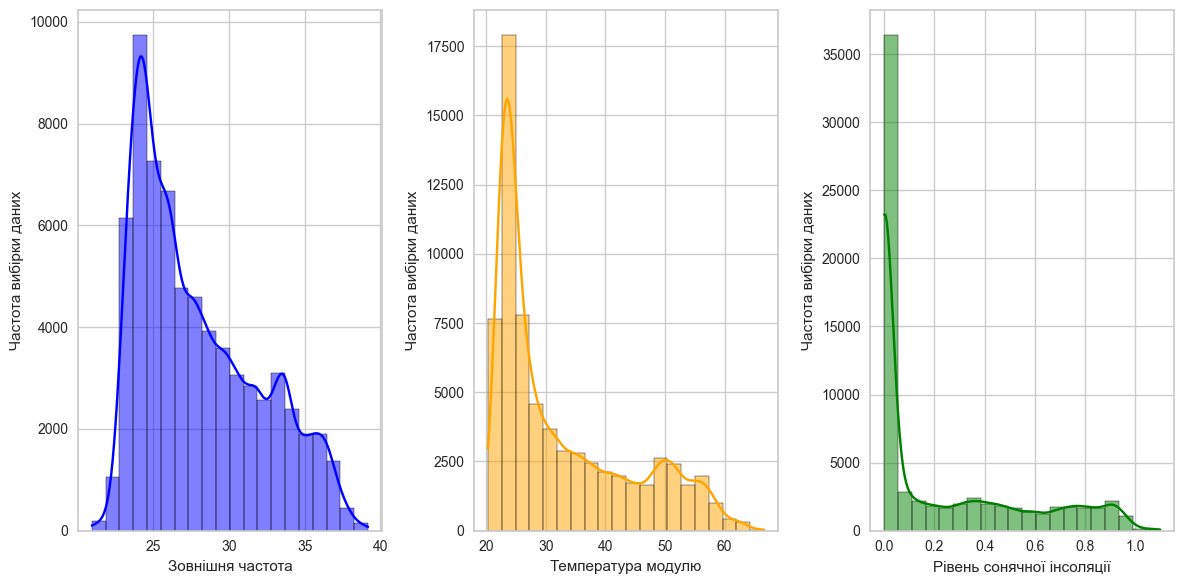

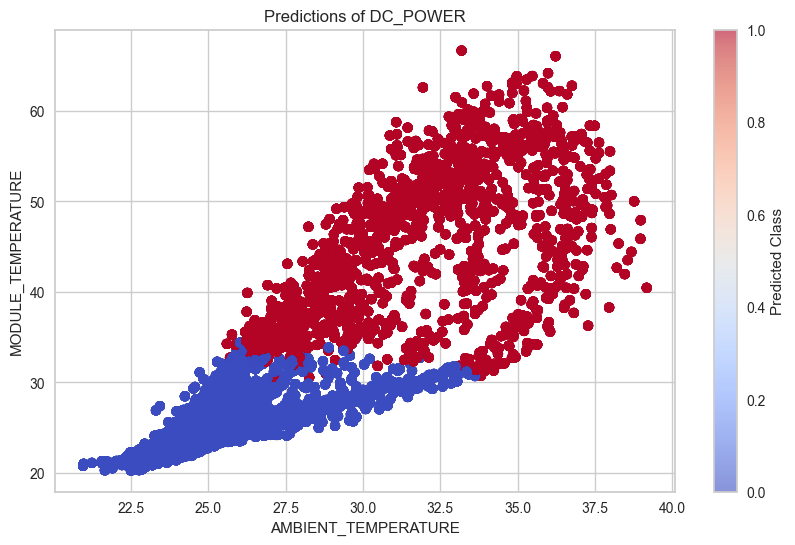

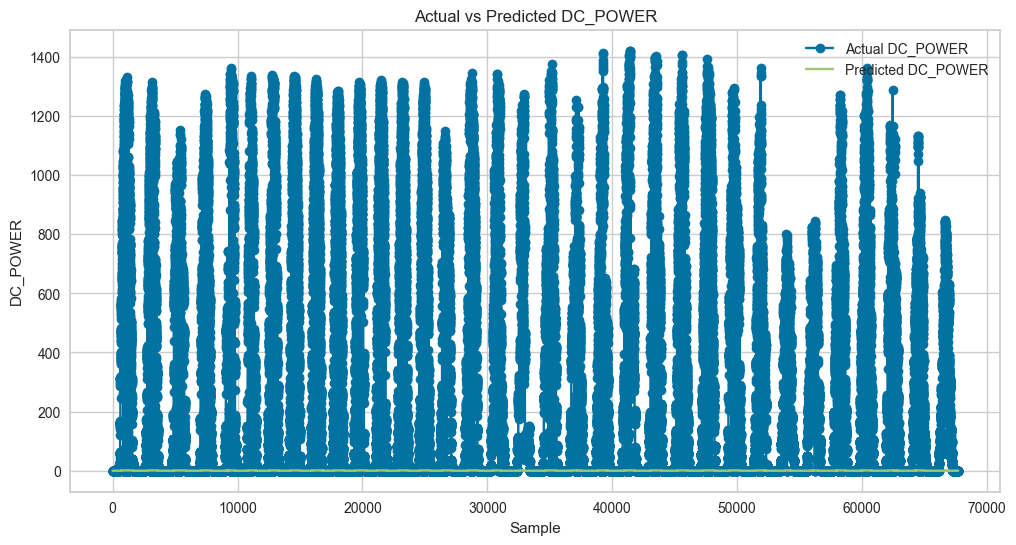

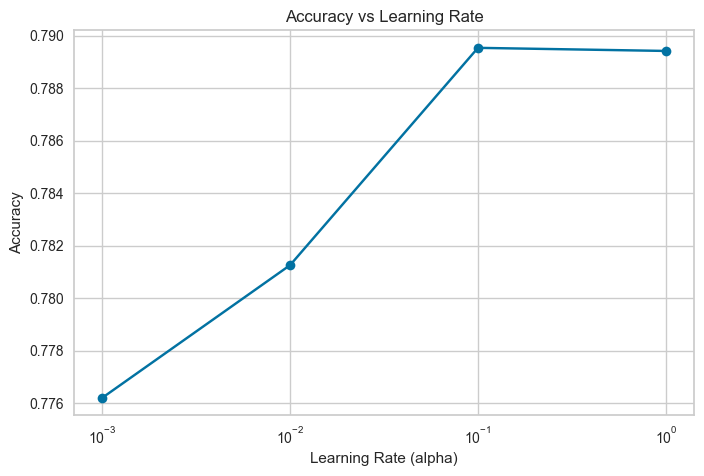

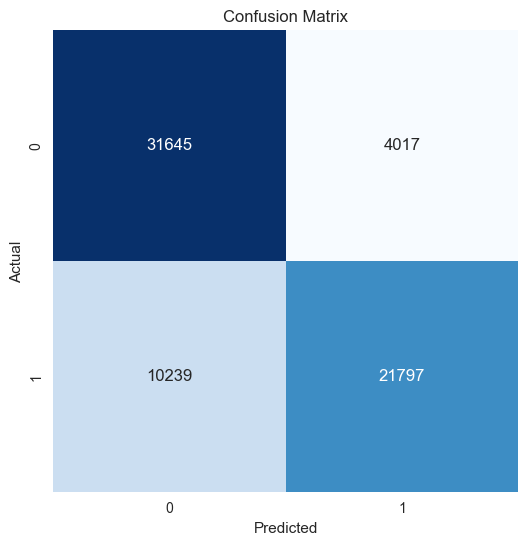

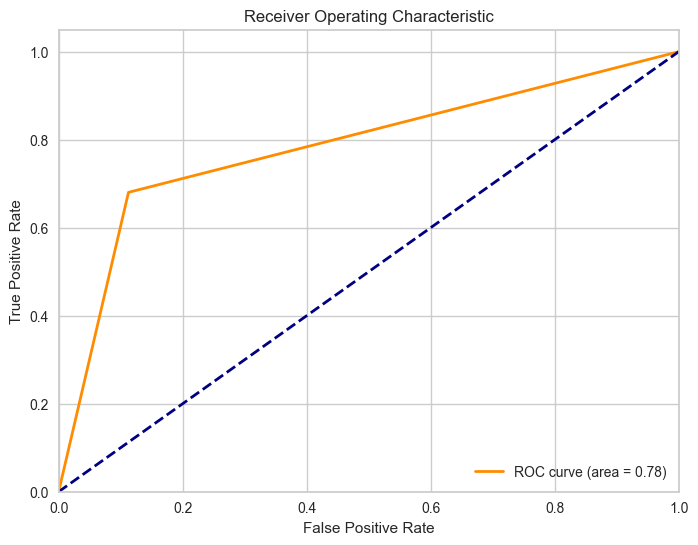

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Розподіл даних
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['AMBIENT_TEMPERATURE'], bins=20, kde=True, color='blue')
plt.xlabel('Зовнішня частота')
plt.ylabel('Частота вибірки даних')

plt.subplot(1, 3, 2)
sns.histplot(data['MODULE_TEMPERATURE'], bins=20, kde=True, color='orange')
plt.xlabel('Температура модулю')
plt.ylabel('Частота вибірки даних')

plt.subplot(1, 3, 3)
sns.histplot(data['IRRADIATION'], bins=20, kde=True, color='green')
plt.xlabel('Рівень сонячної інсоляції')
plt.ylabel('Частота вибірки даних')

plt.tight_layout()
plt.show()


# Scatter plot з прогнозами
plt.figure(figsize=(10, 6))
plt.scatter(data['AMBIENT_TEMPERATURE'], data['MODULE_TEMPERATURE'], c=predictions, cmap='coolwarm', alpha=0.6)
plt.xlabel('AMBIENT_TEMPERATURE')
plt.ylabel('MODULE_TEMPERATURE')
plt.title('Predictions of DC_POWER')
plt.colorbar(label='Predicted Class')
plt.show()

# Графік реальних і прогнозованих значень DC_POWER
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DC_POWER'], label='Actual DC_POWER', marker='o')
plt.plot(data.index, predictions.astype(int), label='Predicted DC_POWER', marker='x')
plt.xlabel('Sample')
plt.ylabel('DC_POWER')
plt.title('Actual vs Predicted DC_POWER')
plt.legend()
plt.show()

# Залежність точності від параметрів моделі
alpha_values = [0.001, 0.01, 0.1, 1.0]
accuracy_values = []
for alpha in alpha_values:
    w = gradient_descent(X, y, np.zeros(X.shape[1]), alpha, iterations)
    predictions = sigmoid(np.dot(X, w)) >= 0.5
    accuracy_values.append(np.mean(predictions == y))

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.grid(True)
plt.show()

# Матриця помилок
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC крива
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Припустимо, що predictions містить прогнозовані значення (наприклад, True або False)
predictions = model.predict(X)

# Створення стовпця 'DC_POWER_class'
data['DC_POWER_class'] = predictions.astype(int)

# Перевірка, як виглядає ваш датасет з новим стовпцем
print(data.head())

# Після цього ви можете відобразити Pairplot з кольором за стовпцем 'DC_POWER_class'
sns.pairplot(data, vars=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'], hue='DC_POWER_class', palette='viridis')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

NameError: name 'model' is not defined